## Importa as bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pretify das barras de progresso do treinamento
# import tqdm
# import tqdm.auto
# tqdm.tqdm = tqdm.auto.tqdm

## Especifica os diretórios das imagens e as prepara para treinamento

In [2]:
train_dir = '/home/qualcomm/Projetos/smart_hydrometer/data/treino'
val_dir = '/home/qualcomm/Projetos/smart_hydrometer/data/teste'

In [3]:
batch_size = 100

In [4]:
image_gen_train = ImageDataGenerator(rescale = 1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (40, 30),
                                                    class_mode = 'sparse',
                                                    color_mode = 'grayscale')

Found 11478 images belonging to 10 classes.


In [5]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, 
                                                 directory=val_dir, 
                                                 target_size=(40, 30),
                                                 class_mode='sparse',
                                                 color_mode = 'grayscale')

Found 1203 images belonging to 10 classes.


## Cria e treina a rede

In [6]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(40, 30, 1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
epochs = 25
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/25
115/115 [==============================] - 3s 26ms/step - loss: 1.2313 - acc: 0.5951 - val_loss: 0.2788 - val_acc: 0.9135
Epoch 2/25
115/115 [==============================] - 2s 19ms/step - loss: 0.1115 - acc: 0.9707 - val_loss: 0.0745 - val_acc: 0.9850
Epoch 3/25
115/115 [==============================] - 2s 19ms/step - loss: 0.0574 - acc: 0.9855 - val_loss: 0.0458 - val_acc: 0.9867
Epoch 4/25
115/115 [==============================] - 2s 20ms/step - loss: 0.0405 - acc: 0.9902 - val_loss: 0.0711 - val_acc: 0.9701
Epoch 5/25
115/115 [==============================] - 2s 19ms/step - loss: 0.0261 - acc: 0.9929 - val_loss: 0.0239 - val_acc: 0.9942
Epoch 6/25
115/115 [==============================] - 2s 19ms/step - loss: 0.0216 - acc: 0.9953 - val_loss: 0.0160 - val_acc: 0.9958
Epoch 7/25
115/115 [==============================] - 2s 19ms/step - loss: 0.0166 - acc: 0.9957 - val_loss: 0.0253 - val_acc: 0.9942
Epoch 8/25
115/115 [==============================] - 2s 19ms/step - 

## Exibe graficamente o desempenho da rede

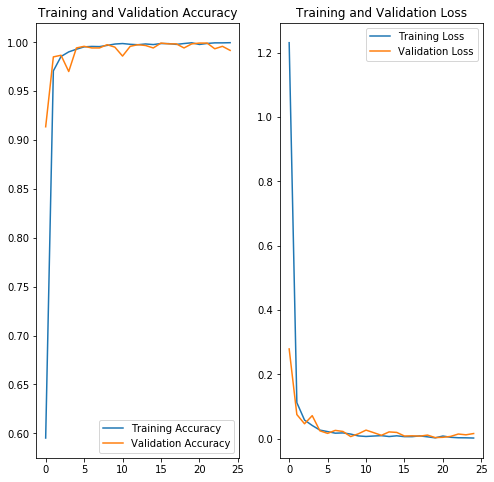

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
model.save('/home/qualcomm/Projetos/smart_hydrometer/hydrometer_model_new.h5')